<a href="https://colab.research.google.com/github/SakshamTripathi1996/Data-Science/blob/main/Saksham_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

  Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

 This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.Explore and analyze the data to discover important factors that govern the bookings. 

#                  **EDA on Hotel Booking**

# Improting Libraries


In [1]:
import pandas as pd
import numpy as np
import datetime 
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




#Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Data

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

# Exploring Dataset

No of Rows and Columns

In [24]:
data.shape

(79069, 31)

Information of Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Description Of Dataset

In [27]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_day_Rate,required_car_parking_spaces,total_of_special_requests
count,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000,79069.000000
mean,0.262581,75.660790,2016.219745,15.799567,1.018402,2.650811,1.889173,0.150109,0.011926,0.041495,0.026003,0.201583,0.278516,82.348190,10.775980,0.487764,107.932804,0.091945,0.716071
std,0.440039,81.855158,0.680910,8.843164,1.035639,2.071705,0.634777,0.473128,0.119216,0.199434,0.315141,1.815607,0.727963,110.212878,53.224792,7.629491,56.101881,0.292992,0.835542
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,46.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,99.210000,0.000000,1.000000
75%,1.000000,118.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,136.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,25.000000,72.000000,18.000000,535.000000,543.000000,330.000000,5400.000000,8.000000,5.000000


*Quick observation*
27.4 % of the people have cancelled their booking as per the dataset.
Avg. lead time is 80 days.
Only 4% of the guests are repeated.
Each booking has on an average 1.8 adults and 0.13 children.

#**Cleaning Of Dataset**

Dropping Duplicates

In [4]:
data.duplicated().value_counts()
data.drop_duplicates(keep=False,inplace=True)

Filling Null Values

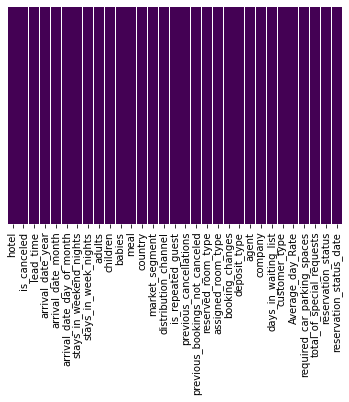

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
a=data['children'].fillna(data['children'].mode)

In [5]:
nullv={'children':0,'agent':0,'country':'unknown','company':0}
data=data.fillna(nullv)


In [6]:
# changing dtype to its correct dtype
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date']).dt.date.astype('datetime64[ns]')
data['children']=data['children'].astype(int)
data['company']=data['company'].astype(int)
data['agent']=data['agent'].astype(int)

In [7]:
data.shape

(79225, 32)

In [8]:
# Changing Column names 
data=data.rename(columns={'adr':'Average_day_Rate'})

In [ ]:
#bb-bed and breakfast
#hb-half board-breakfast and dinner
#fb-full board -lunch breakfast dinner
#sc-self catering - no meals

In [69]:
'''Univariate Analysis
1. Which agent made most of bookings
2.Which Room Type is in most demands and which room type generate highest adr?
3.From which country most of the customers comming?
4.what is the most preferred meal by customers?'''


'Univariate Analysis\n1. Which agent made most of bookings\n2.Which Room Type is in most demands and which room type generate highest adr?\n3.From which country most of the customers comming?\n4.what is the most preferred meal by customers?'

Dropping Columns

In [9]:
# Dropping Data which  does not make any sense.
data[data['children']+data['babies']+data['adults']==0].shape
data.drop(data[data['children']+data['babies']+data['adults']==0].index,inplace=True)
data.drop('arrival_date_week_number',inplace=True,axis=1)

From which country most guests come?

In [12]:
a=data.groupby('country')['country'].count().sort_values(ascending=False)
a=a[:10]

Text(0, 0.5, 'No.of Bookings')

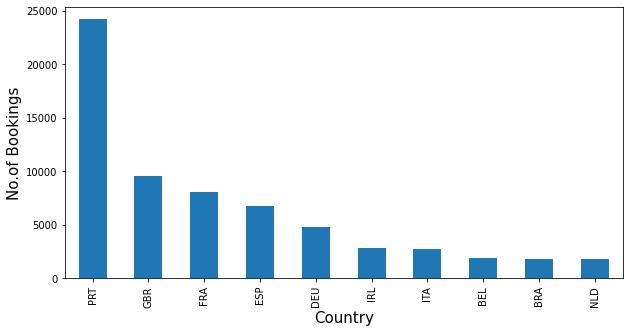

In [14]:
ax=a.plot.bar(figsize=(10,5),fontsize=10)
ax.set_xlabel("Country",fontsize=15)
ax.set_ylabel("No.of Bookings",fontsize=15)



1.How Many Booking Were Cancelled?
2.What is the booking ratio between Resort Hotel and City Hotel?
3.What is the percentage of booking for each year?
4.Which is the most busy month for hotel?
5.From which country most guest come?
6.How Long People Stay in the hotel?
7.Which was the most booked accommodation type (Single, Couple, Family)?

In [170]:
'''
1.How Many Booking Were Cancelled?
2.What is the booking ratio between Resort Hotel and City Hotel?
3.What is the percentage of booking for each year?
4.Which is the most busy month for hotel?
5.From which country most guest come?
6.How Long People Stay in the hotel?
7.Which was the most booked accommodation type (Single, Couple, Family)?

8. How strong is the seasonality?

Hotels, spetially resort hotels are known to have strong seasonality. 
If you are managing one of this hotels or if you want to introduce yourself in a market,
a very basic point is to understand the seasonality patterns. ¿how strong is the seasonality? 
¿When does the 'summer season' beggins in this location (April, May, ...)?

9. Up to what point ADR, length of stay, and lead time for group reservations differ from individual/transient ones?

This question is important from the revenue point of view: if groups usually make reservations with a lot of antelation, 
they could by at a cheaper price, since ussually there are erly booking offers, and prices tend to be higher when there is little antelation. 
In this situation, an hotelier can have an hotel nearly at the top of its capacity for a series of consecutive nights, 
that have been sold at a very low price, because a group made the reservation well on advance. Moreover, 
if a group comes to an event that takes place for only two days, say tuesday and wenedsday (in the middle of the week), 
and this group makes for 80 or 90 % of the hotel rooms, in some hotels it will me more difficultto fill up the hotel for that particular week. 
It will be more difficult to sell a room when you are forced to sell it "from thursday to sunday". 
For this reason sometimes the price for a group should be higher than the average rate. 
We'll also try to check if this difficulty to sell rooms in the adjancent days of a group stay is true in the case of these two hotels.

10. Can we predict a cancellation, just with the information available at the moment this reservation has been made?

If we can predict wether or not a booking will be cancelled we can target this client (if posible) for specific marketing campaigns for clients 
that will likely cancel a reservation if no action is taken.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79069 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79069 non-null  object        
 1   is_canceled                     79069 non-null  int64         
 2   lead_time                       79069 non-null  int64         
 3   arrival_date_year               79069 non-null  int64         
 4   arrival_date_month              79069 non-null  object        
 5   arrival_date_day_of_month       79069 non-null  int64         
 6   stays_in_weekend_nights         79069 non-null  int64         
 7   stays_in_week_nights            79069 non-null  int64         
 8   adults                          79069 non-null  int64         
 9   children                        79069 non-null  int64         
 10  babies                          79069 non-null  int64         
 11  m

How Many Booking Were Cancelled?

In [11]:
data['is_canceled'].value_counts()


0    58307
1    20762
Name: is_canceled, dtype: int64

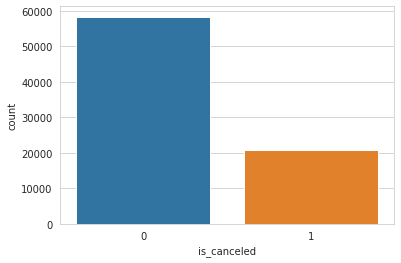

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',data=data)


Cancellation on basis of Hotels

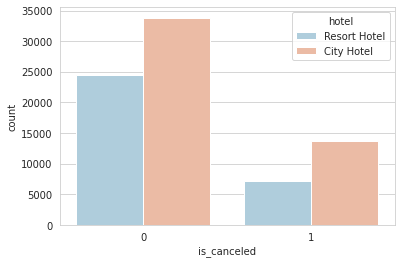

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',hue='hotel',data=data,palette="RdBu_r")

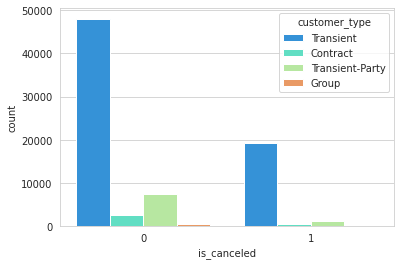

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',hue='customer_type',data=data,palette="rainbow")

In [22]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_day_Rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,1,0,2,2,0,...,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [19]:
data['customer_type'].value_counts()

Transient          67289
Transient-Party     8379
Contract            2884
Group                517
Name: customer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


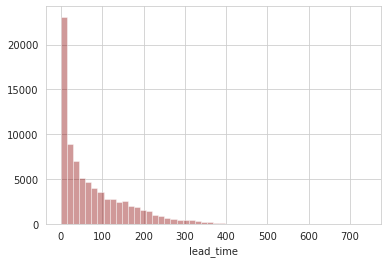

In [25]:
sns.distplot(data['lead_time'],kde=False,color='darkred')

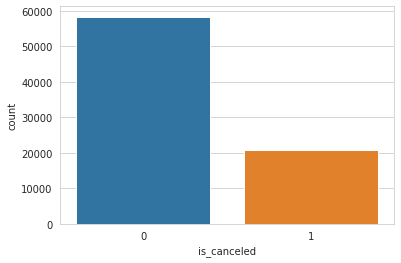

In [24]:
sns.countplot(x='is_canceled',data=data)